In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

from Modules.ShapeShadow import Ellipse, Sector, Mask
from Modules.Beamer import MapPattern, Spot, SpotCollection
from Modules.JAW import JAW

In [2]:
load_dotenv()

DATA_PATH = os.getenv("DATA_PATH")
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(DATA_PATH)

In [3]:
jaw = JAW(DATA_PATH)

theta = 5.1
alpha = 65
d_spor = 0.03

Column names:
- Point #
- Z Align
- SigInt
- Tilt X
- Tilt Y
- Hardware OK
- MSE
- Thickness # 1 (nm)
- A
- B
- n of Cauchy Film @ 632.8 nm
- Fit OK
- x
- y


In [4]:
# Lærke measurements and offset
# Setting up measureing points
xoff_laerke = 0
yoff_laerke = 2.5
toff_laerke = 0 

laerke_spot = Spot(diameter=d_spor, angle_incident=alpha)
laerke_mp = MapPattern(jaw.data.x, jaw.data.y, x_offset=xoff_laerke, y_offset=yoff_laerke, theta_offset=toff_laerke)
laerke_sc = SpotCollection(map_pattern=laerke_mp, spot=laerke_spot)

In [5]:
# Defining sample outline
sector = Sector(radius=2.54*2, angle_sweep=90)
sector.rotate(225+4.1).translate(-.0531, 2.8368)

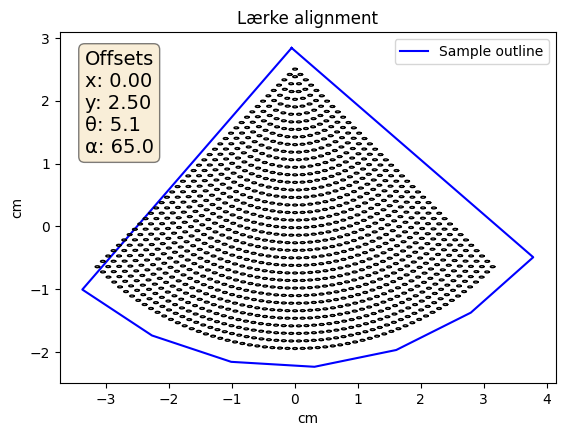

In [6]:
fig0, ax0 = plt.subplots()
ax0.plot(sector.x, sector.y, '-b', label="Sample outline")

for ellipse in laerke_sc.outlines():
    ax0.plot(ellipse.x, ellipse.y, '-k', linewidth=1)

ax0.set_title("Lærke alignment")
ax0.set_xlabel("cm")
ax0.set_ylabel("cm")

textstr = '\n'.join((
    "Offsets",
    f"x: {xoff_laerke:.2f}",
    f"y: {yoff_laerke:.2f}",
    f"\u03B8: {theta:.1f}",
    f"\u03B1: {alpha:.1f}")
)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=14,
    verticalalignment='top', bbox=props)

ax0.set_aspect("equal")

plt.legend()
plt.show()

# Current Alignment


In [7]:
xoff_curr = 0.5
yoff_curr = 2.0
toff_curr = 0

curr_spot = Spot(diameter=d_spor, angle_incident=alpha)
curr_mp = MapPattern(jaw.data.x, jaw.data.y, x_offset=xoff_curr, y_offset=yoff_curr, theta_offset=toff_curr)
curr_sc = SpotCollection(map_pattern=curr_mp, spot=curr_spot)

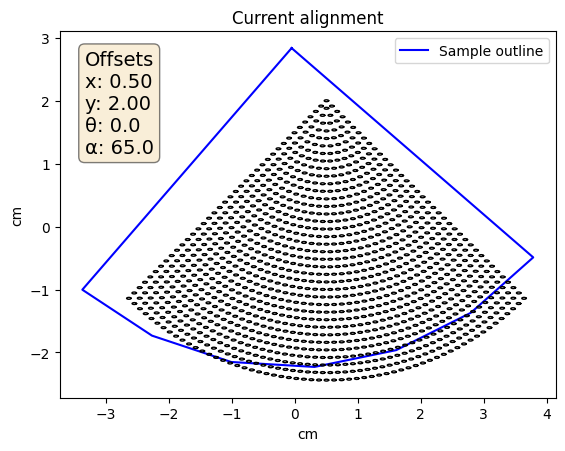

In [8]:
fig1, ax1 = plt.subplots()
ax1.plot(sector.x, sector.y, '-b', label="Sample outline")

for ellipse in curr_sc.outlines():
    ax1.plot(ellipse.x, ellipse.y, '-k', linewidth=1)

ax1.set_title("Current alignment")
ax1.set_xlabel("cm")
ax1.set_ylabel("cm")

textstr = '\n'.join((
    "Offsets",
    f"x: {xoff_curr:.2f}",
    f"y: {yoff_curr:.2f}",
    f"\u03B8: {toff_curr:.1f}",
    f"\u03B1: {alpha:.1f}")
)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
    verticalalignment='top', bbox=props)

ax1.set_aspect("equal")

plt.legend()
plt.show()

# Suggested alignment


In [9]:
xoff_sugg = -0.03
yoff_sugg = 2.5176
toff_sugg = 4.1

spot_sugg = Spot(0.03, 65)
mp_sugg = MapPattern(jaw.data.x, jaw.data.y, xoff_sugg, yoff_sugg, toff_sugg)
sc_sugg = SpotCollection(mp_sugg, spot_sugg)

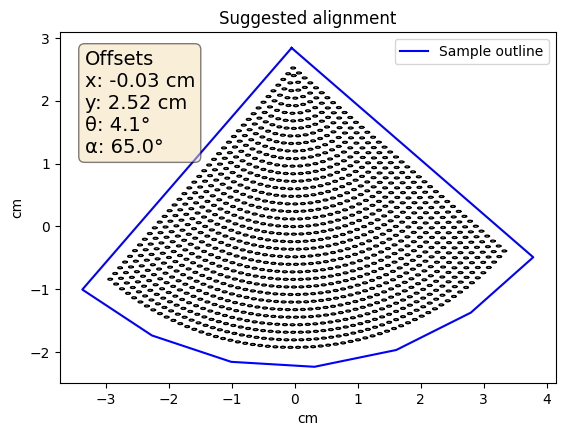

In [10]:
fig2, ax2 = plt.subplots()
ax2.plot(sector.x, sector.y, '-b', label="Sample outline")

for ellipse in sc_sugg.outlines():
    ax2.plot(ellipse.x, ellipse.y, '-k', linewidth=1)

ax2.set_title("Suggested alignment")
ax2.set_xlabel("cm")
ax2.set_ylabel("cm")

textstr = '\n'.join((
    "Offsets",
    f"x: {xoff_sugg:.2f} cm",
    f"y: {yoff_sugg:.2f} cm",
    f"\u03B8: {toff_sugg:.1f}\N{DEGREE SIGN}",
    f"\u03B1: {alpha:.1f}\N{DEGREE SIGN}")
)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=14,
    verticalalignment='top', bbox=props)

ax2.set_aspect("equal")

plt.legend()
plt.show()